## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)
# X.shape

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
True in X.isna()

False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(seed=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X=X.loc[:, ['alcohol', 'magnesium']])
X_train_transformed = scaler.transform(X=X_train.loc[:, ['alcohol', 'magnesium']])
X_test_transformed = scaler.transform(X=X_test.loc[:, ['alcohol', 'magnesium']])
X_transformed = scaler.transform(X=X.loc[:, ['alcohol', 'magnesium']])

In [7]:
from collections.abc import Callable
classifiers: list[Callable] = []
ks = [1, 3, 5, 10, 15, 25]
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X=X_train_transformed, y=y_train)
    classifiers.append(neigh)

for c in classifiers:
    print(c)

KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier(n_neighbors=15)
KNeighborsClassifier(n_neighbors=25)


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
# !pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
# import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [10]:
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_decision_regions
# import matplotlib.gridspec as gridspec
# from itertools import product

# gs = gridspec.GridSpec(2, 3)

# fig = plt.figure(figsize=(20,8), dpi=200)

# labels = [f'knn for {k}' for k in ks]
# for clf, lab, grd in zip(classifiers,
#                          labels,
#                          product([0, 1], [0, 1, 2])):

#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=X_train_transformed.to_numpy(), y=y_train, clf=clf, legend=2)
#     plt.title(lab)

# plt.show()

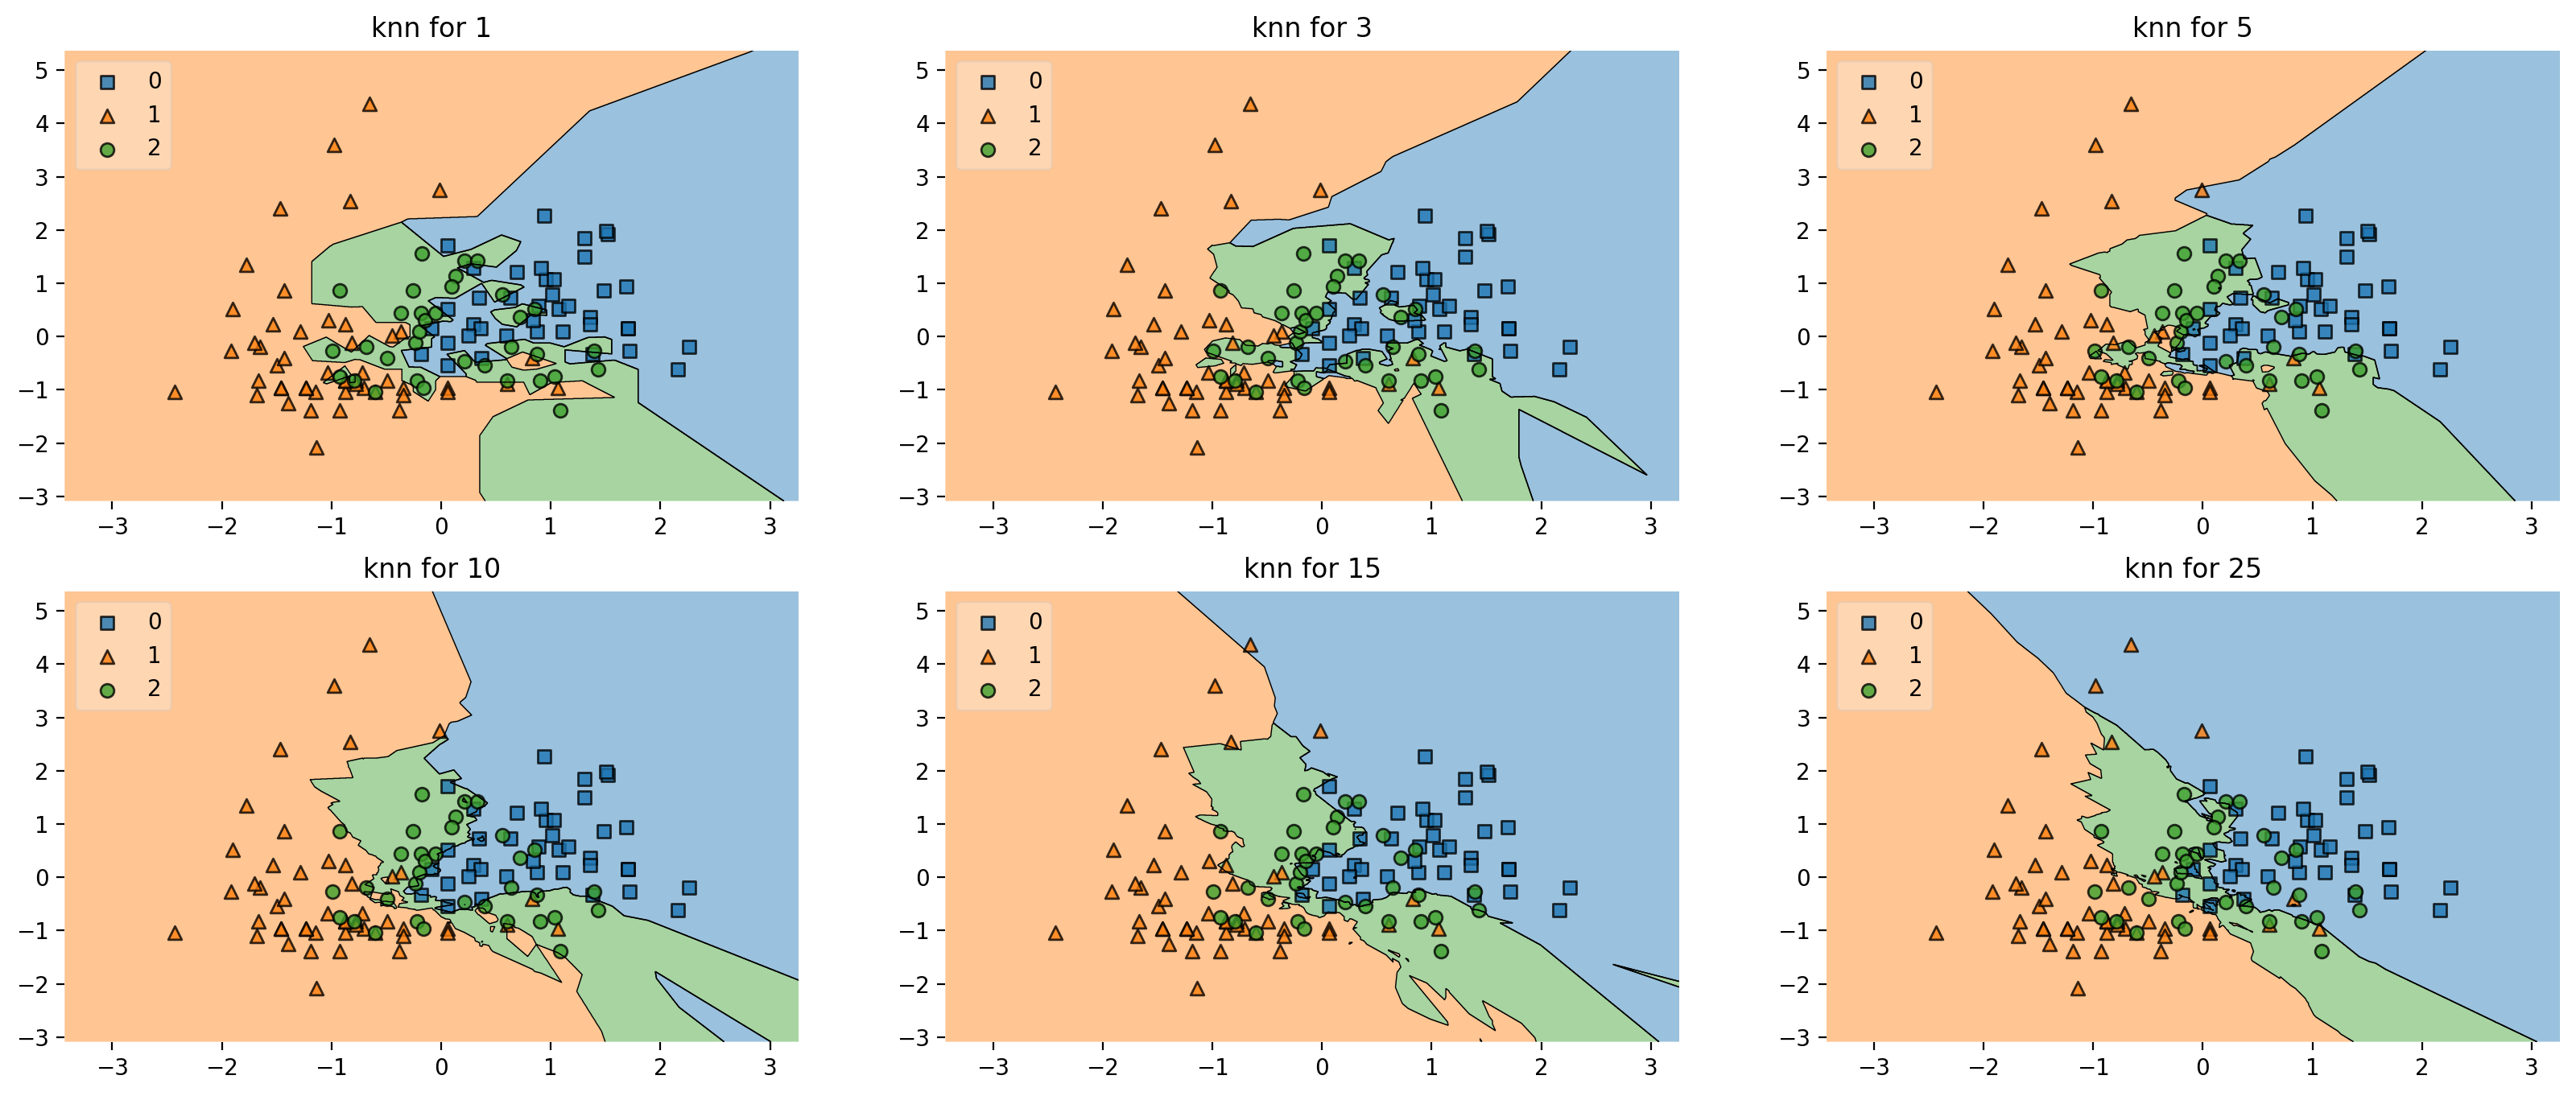

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Наиболее удачным выбором будет __k=25__, так как при таком значении наименьшее количество выбросов

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

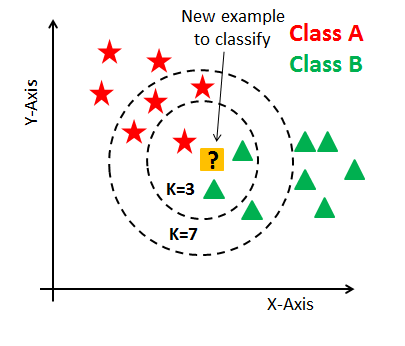

In [11]:
import numpy as np
from collections import Counter
from numpy.typing import NDArray

class KNN:
	def __init__(self, k:int):
		self.k = k
		self.X: NDArray
		self.y: NDArray

	def __euclidian_distance__(self, p1: list, p2: list) -> int | float:
		return sum([(c1 - c2)**2 for c1, c2 in zip(p1, p2)])**0.5

	def fit(self, X: NDArray, y: NDArray):
		self.X = X
		self.y = y

	def predict(self, X: NDArray):
		answers = []
		for x in X:
			k_nearest = sorted(zip(self.X, self.y), key=lambda o: self.__euclidian_distance__(o[0], x))
			answers.append(Counter([o[1] for o in k_nearest[:self.k]]).most_common(1)[0][0])
		return answers

In [12]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1, 0]

In [13]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [14]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [15]:
True in data.isna()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [16]:
# бессмысленных данных нет, однако есть стобец depth, который зависит от x, y, z

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

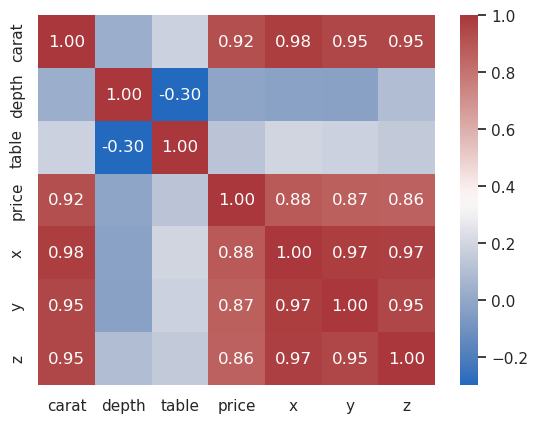

In [17]:
ax = sns.heatmap(data.corr(numeric_only=True), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")
# больше всего коррелируют: carat, x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [18]:
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
data_encoded

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
5,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [19]:
from sklearn.model_selection import train_test_split
X = data_encoded.loc[:, data_encoded.columns != 'price'] # type: ignore
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [20]:
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X)
X_train_transformed = scaler.transform(X=X_train)
X_test_transformed = scaler.transform(X=X_test)
X_transformed = scaler.transform(X=X)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_transformed, y_train)
print(f'test score(reg): {reg.score(X_test_transformed, y_test)}', 
      f'train score(reg): {reg.score(X_train_transformed, y_train)}',
      sep='\n')

# FIXME: Почему хуже?
reg2 = LinearRegression().fit(X_train_transformed.loc[:, ~X_train_transformed.columns.isin(['depth', 'table'])], y_train)
print(f'test score(reg2): {reg2.score(X_test_transformed.loc[:, ~X_test_transformed.columns.isin(["depth", "table"])], y_test)}', 
      f'train score(reg2): {reg2.score(X_train_transformed.loc[:, ~X_train_transformed.columns.isin(["depth", "table"])], y_train)}',
      sep='\n')

test score(reg): 0.9201866914388086
train score(reg): 0.9195976267987522
test score(reg2): 0.9198643753981292
train score(reg2): 0.9192697440696994


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [22]:
print(*sorted(list(zip(reg.feature_names_in_, reg.coef_)), key=lambda o: abs(o[1]), reverse=True), sep='\n')

('carat', 5321.298131348404)
('x', -1099.9314496786787)
('clarity_SI2', -492.554925462797)
('clarity_I1', -476.2861931017718)
('color_J', -387.35010609753647)
('clarity_VVS2', 273.1807825492376)
('clarity_VVS1', 253.7221867863665)
('color_I', -251.91463008511124)
('clarity_IF', 244.8925429151529)
('color_D', 211.53256113567434)
('clarity_VS1', 202.92165578750232)
('color_E', 162.41504120591478)
('clarity_SI1', -145.7174013908969)
('color_F', 139.27604511243615)
('color_H', -130.04533160572942)
('cut_Fair', -125.8920745685942)
('clarity_VS2', 102.62318994514212)
('depth', -90.42609231987122)
('table', -60.54532096703353)
('color_G', 56.20006048182528)
('cut_Ideal', 52.10762788036958)
('cut_Good', -41.489550293088534)
('z', -33.98244668982014)
('cut_Premium', 16.558992558978975)
('y', -6.4337597169105125)
('cut_Very Good', 1.4550118683628104)


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [23]:
def clf_coefs(clf) -> list:
    return sorted(list(zip(clf.feature_names_in_, clf.coef_)), key=lambda o: abs(o[1]), reverse=True)
  
def print_clf_score(clf) -> None:
    print(f'test score({str(clf.__class__())[:-2]}): {clf.score(X_test_transformed, y_test)}', 
          f'train score({str(clf.__class__())[:-2]}): {clf.score(X_train_transformed, y_train)}',
          sep='\n')

In [24]:
from sklearn.linear_model import Lasso, Ridge

alpha: float = 10
lasso_clf = Lasso(alpha).fit(X_train_transformed, y_train)
ridge_clf = Ridge(alpha).fit(X_train_transformed, y_train)

print_clf_score(lasso_clf)
print_clf_score(ridge_clf)

test score(Lasso): 0.9194771661484732
train score(Lasso): 0.918895247985796
test score(Ridge): 0.9201718347058867
train score(Ridge): 0.919593639172728


In [25]:
print('-------=====Lasso=====-------', *clf_coefs(lasso_clf), sep='\n')

-------=====Lasso=====-------
('carat', 4857.181790906747)
('x', -651.3700775950274)
('clarity_SI2', -575.3544278629546)
('clarity_I1', -491.3617095290695)
('color_J', -402.82819036605474)
('color_I', -279.6903982363776)
('clarity_SI1', -251.68477052312872)
('clarity_VVS2', 194.71719499396616)
('clarity_IF', 194.39723113749528)
('clarity_VVS1', 187.1112701015575)
('color_H', -171.66318000845982)
('color_D', 148.15626583131714)
('cut_Fair', -126.72252747457408)
('clarity_VS1', 101.27639457557152)
('color_E', 92.68300189107474)
('color_F', 68.971360658952)
('depth', -57.096900670512184)
('table', -47.79869625357571)
('z', -44.282492391302036)
('cut_Good', -42.934434430568125)
('cut_Ideal', 41.75285802083164)
('y', -0.0)
('cut_Premium', 0.0)
('cut_Very Good', -0.0)
('color_G', -0.0)
('clarity_VS2', -0.0)


In [26]:
print('-------=====Ridge=====-------', *clf_coefs(ridge_clf), sep='\n')

-------=====Ridge=====-------
('carat', 5284.297578219942)
('x', -1056.9556622211542)
('clarity_SI2', -492.39038301296915)
('clarity_I1', -475.78043483254123)
('color_J', -386.6075021702746)
('clarity_VVS2', 273.43257413644847)
('clarity_VVS1', 254.19178222575414)
('color_I', -251.28700711362126)
('clarity_IF', 245.24194437760465)
('color_D', 211.27854881199954)
('clarity_VS1', 202.7059260919068)
('color_E', 162.18051600143264)
('clarity_SI1', -146.23528719942027)
('color_F', 138.80595048049346)
('color_H', -129.75318831311125)
('cut_Fair', -126.06066312601446)
('clarity_VS2', 102.4428168947385)
('depth', -87.89646348012238)
('table', -60.3373021874129)
('color_G', 55.94162766171282)
('cut_Ideal', 52.08528058186501)
('cut_Good', -41.57343309273779)
('z', -37.765662592456515)
('cut_Premium', 16.543661783331114)
('y', -9.571536462412984)
('cut_Very Good', 1.6239715021096657)


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

<Axes: xlabel='alpha', ylabel='w_norm'>

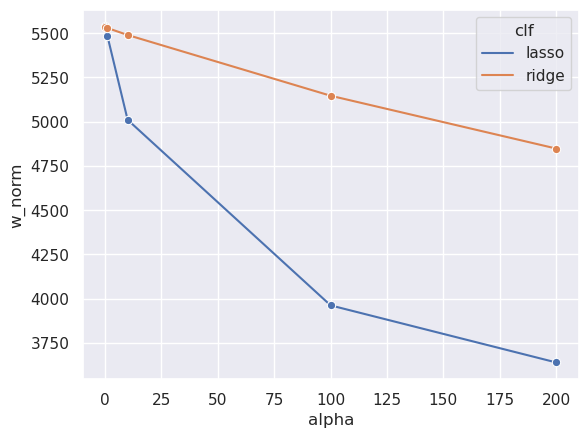

In [27]:
alphas = [0.1, 1, 10, 100, 200]
clfs_data = pd.DataFrame(columns=['clf', 'alpha', 'w_norm'])
for alpha in alphas:
    lasso_clf = Lasso(alpha).fit(X_train_transformed, y_train)
    ridge_clf = Ridge(alpha).fit(X_train_transformed, y_train)
    clfs_data.loc[len(clfs_data.index)] = ['lasso', alpha, np.linalg.norm(lasso_clf.coef_)]
    clfs_data.loc[len(clfs_data.index)] = ['ridge', alpha, np.linalg.norm(ridge_clf.coef_)]
    
sns.lineplot(x="alpha", y="w_norm", 
             hue="clf", marker='o', data=clfs_data)

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [28]:
from sklearn.linear_model import LassoCV
lasso_cv_clf = LassoCV(alphas=alphas, cv=5, random_state=42).fit(X_train_transformed, y_train)
alpha_mse = zip(lasso_cv_clf.alphas_, [np.mean(mses) for mses in lasso_cv_clf.mse_path_])
print(min(alpha_mse, key=lambda o: o[1]))

(1.0, 1293685.2851752266)


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [29]:
lasso_clf_final = Lasso(alpha=1).fit(X_train_transformed, y_train)
print(*clf_coefs(lasso_clf_final), sep='\n')

('carat', 5275.268382237695)
('x', -1056.582989042941)
('clarity_SI2', -583.7145731631513)
('clarity_I1', -503.4443360138399)
('color_J', -416.43061900268805)
('color_I', -291.9487692859078)
('clarity_SI1', -250.73420434839127)
('clarity_VVS2', 201.05749259371603)
('clarity_IF', 200.39462615212474)
('clarity_VVS1', 191.6881297364943)
('color_H', -178.90073123224013)
('color_D', 164.24828486234716)
('cut_Fair', -131.73750651301472)
('clarity_VS1', 113.77759414223894)
('color_E', 107.76324571926533)
('depth', -87.06841549564123)
('color_F', 85.02245767298209)
('table', -59.23852881382784)
('cut_Good', -51.397224353754005)
('z', -35.30241023412882)
('cut_Ideal', 34.480051788026564)
('cut_Very Good', -12.698364061157962)
('y', -4.262081093163566)
('cut_Premium', 0.0)
('color_G', -0.0)
('clarity_VS2', -0.0)


Признаки `clarity`, `color_G`, `cut_Premium` оказались бесполезными. \
Признак `carat` оказался наиболее информативным. \
Данный результат показывает, что признак `carat` оказывает наибольшее влияние на стоймость алмаза, в то же время признаки внизу списка оказывают наименьшее влияние на стоймость алмаза, поэтому их можно исключить.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [30]:
from sklearn.metrics import mean_squared_error
print('Lasso MSE test:', mean_squared_error(y_test, lasso_clf_final.predict(X_test_transformed)))
print('Lasso MSE train:', mean_squared_error(y_train, lasso_clf_final.predict(X_train_transformed)))

print('Reg MSE test:', mean_squared_error(y_test, reg.predict(X_test_transformed)))
print('Reg MSE train:', mean_squared_error(y_train, reg.predict(X_train_transformed)))

Lasso MSE test: 1244863.9418295936
Lasso MSE train: 1290652.8682411148
Reg MSE test: 1244765.4357158705
Reg MSE train: 1290541.9147450612
